In [1]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

In [2]:
os.chdir("C:\\Nastaran\\Spring2019\\Python\\Online_shoppers_intention")

In [3]:
data = pd.read_csv("online_shoppers_intention.csv", sep=',')
data.head()
len(data.columns)

18

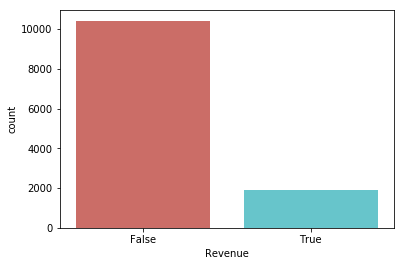

In [4]:
sns.countplot(x='Revenue',data=data, palette='hls')

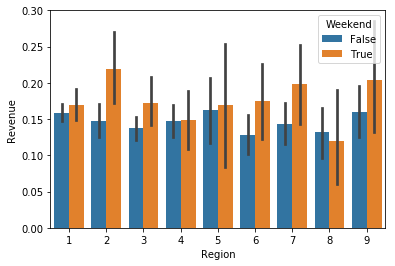

In [5]:
sns.barplot(x="Region", y="Revenue", hue="Weekend", data=data)

## Which month has the most visit?

In [6]:
data.Month.value_counts()/data.shape[0]

May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64

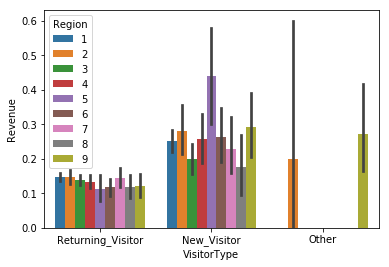

In [7]:
sns.barplot(x="VisitorType", y="Revenue", hue = "Region", data=data)

In [8]:
df = data.groupby("Region").mean()[["Revenue","ProductRelated_Duration"]].sort_values(by=['Revenue'],ascending=False)
df

,Revenue,ProductRelated_Duration
Region,,
9,0.168297,1120.934196
2,0.165493,1182.445068
5,0.163522,1147.762954
1,0.161297,1276.107354
7,0.156373,1142.488546
4,0.148054,1113.594595
3,0.145235,1188.408424
6,0.139130,1035.237000
8,0.129032,1095.784162


In [9]:
df1 = data.groupby("Revenue").mean()
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
Revenue,,,,,,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392,0.227308
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488,0.261530


In [10]:
df3 = data.groupby("Region").Revenue.value_counts()
df3

Region  Revenue
1       False      4009
        True        771
2       False       948
        True        188
3       False      2054
        True        349
4       False      1007
        True        175
5       False       266
        True         52
6       False       693
        True        112
7       False       642
        True        119
8       False       378
        True         56
9       False       425
        True         86
Name: Revenue, dtype: int64

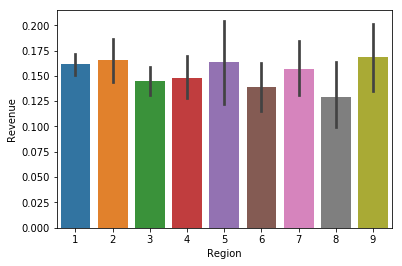

In [11]:
sns.barplot(x='Region', y='Revenue', data = data)

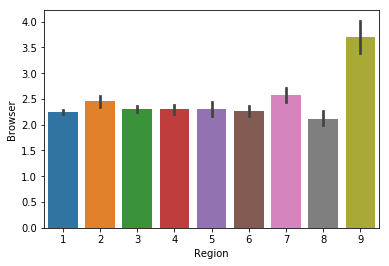

In [12]:
sns.barplot(x=data["Region"], y=data["Browser"], data=data)


In [13]:
data1 = data[["Revenue","Browser"]]
data1.head()

,Revenue,Browser
0,False,1
1,False,2
2,False,1
3,False,2
4,False,3


In [136]:
#col should be less than 15 categories 
def plot_multiple_bar(col,list_of_measures,dataframe):
    
    temp_df = dataframe.groupby([col]).mean()[list_of_measures].reset_index()
    temp_df_melt = pd.melt(temp_df, id_vars=col, var_name="Parameters", value_name="Values")
    g =sns.factorplot(x=col, y='Values',hue ='Parameters', data=temp_df_melt, kind='bar',legend=False,size =7)
    g.set_xticklabels(fontsize='20')
    g.set_yticklabels(fontsize='20')
    g.set_xlabels(fontsize='20')
    g.set_ylabels(fontsize='20')
    g.add_legend(fontsize='20')

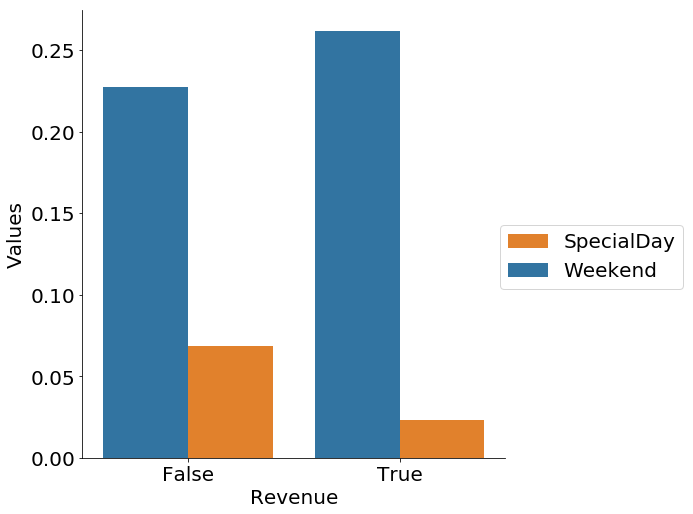

In [15]:
plot_multiple_bar("Revenue",["Weekend","SpecialDay"],data)

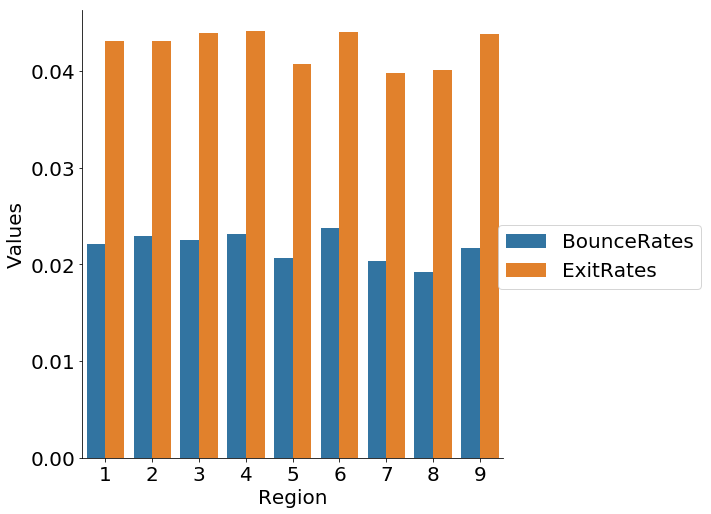

In [16]:
plot_multiple_bar("Region",["BounceRates","ExitRates"],data)

In [17]:
df = data.groupby("Region").mean()[["Revenue"]].sort_values(by=['Revenue'],ascending=False)
df

,Revenue
Region,
9,0.168297
2,0.165493
5,0.163522
1,0.161297
7,0.156373
4,0.148054
3,0.145235
6,0.139130
8,0.129032


## Is any product that has no revenue?

In [18]:
df1 = data.groupby("ProductRelated").mean()[["Revenue"]].sort_values(by=['Revenue'],ascending=False)
df2 = df1[df1.Revenue == False]
df2  #86 products had no revenue

,Revenue
ProductRelated,
313,0.0
312,0.0
311,0.0
305,0.0
328,0.0
292,0.0
315,0.0
192,0.0
337,0.0


#### Which group of visitors made most revenue

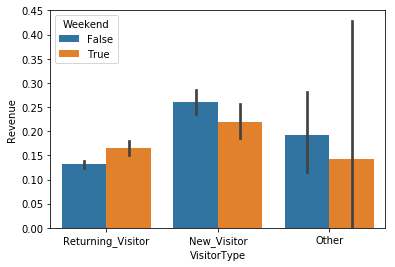

In [19]:
sns.barplot(x='VisitorType', y='Revenue', hue ="Weekend",data = data)

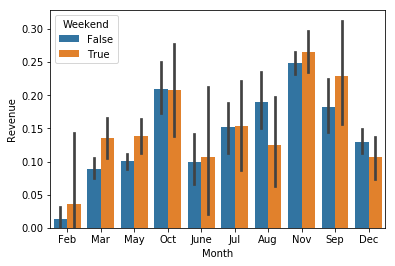

In [20]:
sns.barplot(x='Month', y='Revenue', hue ="Weekend",data = data)

## Is threre class imbalance issue in dataset?

In [21]:
data.Revenue.value_counts()/data.shape[0]   #Label Imbalance Issue exist in the dataset,
                                            #so accuracy will not be enough as an evaluation matrix!

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [22]:
data.Month.value_counts()/data.shape[0]

May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64

## Preparing data to build model

In [23]:
### Independent Variables
x = data.iloc[:, :-1]

In [24]:
### dependent variable => Since we only have 2 different categories, those are mapped to 0 and 1.
y = data.iloc[:, -1].map({True:1,False:0})


In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x["VisitorType"] = labelencoder_x.fit_transform(x["VisitorType"])
x["Month"] = labelencoder_x.fit_transform(x["Month"])
x["Weekend"] = labelencoder_x.fit_transform(x["Weekend"])

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [27]:
onehotencoder = OneHotEncoder(categorical_features = [[11,12,13,14,15,16]])
x = onehotencoder.fit_transform(x).toarray()

In [61]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0,penalty='l1')
Log_Reg_clf = classifier_LR.fit(x, y)

In [62]:
x1 = pd.DataFrame(x)
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2.0


### Model 1: 
### Logistic Regression Classifier

In [63]:
from sklearn.model_selection import cross_val_score
LR_scores = cross_val_score(Log_Reg_clf, x, y, cv=5, scoring='accuracy')
LR_scores                                              

array([0.89906769, 0.89217673, 0.87712895, 0.87626775, 0.86896552])

###### The mean score and the 95% confidence interval of the score estimate are hence given by:

In [64]:
print("Accuracy for Logistic Regression Model is: %0.2f %% (+/- %0.2f)" % (LR_scores.mean()*100, LR_scores.std() * 2))

Accuracy for Logistic Regression Model is: 88.27 % (+/- 0.02)


In [65]:
# precision, recall and F1
from sklearn.preprocessing import LabelBinarizer
y1 = y
lb = LabelBinarizer()
y1 = np.array([number[0] for number in lb.fit_transform(y1)])
LR_Recall = cross_val_score(classifier_LR, x, y1, cv=5, scoring='recall')
print('LR_Recall =', np.mean(LR_Recall), LR_Recall)
LR_precision = cross_val_score(classifier_LR, x, y1, cv=5, scoring='precision')
print('LR_Precision =', np.mean(LR_precision), LR_precision)
LR_F1 = cross_val_score(classifier_LR, x, y1, cv=5, scoring='f1')
print('LR_F1 =', np.mean(LR_F1), LR_F1)

LR_Recall = 0.3762817605914444 [0.41361257 0.38743455 0.38219895 0.34383202 0.35433071]
LR_Precision = 0.7424299475705951 [0.86338798 0.82222222 0.68544601 0.70430108 0.63679245]
LR_F1 = 0.4988263662289317 [0.55929204 0.52669039 0.4907563  0.46208113 0.45531197]


### Model 2:
### KNN Classifier
Feature scalling is requierd!

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [40]:
# Fitting K-NN to data
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_clf = classifier_KNN.fit(x_scaled, y)

In [41]:
KNN_scores = cross_val_score(KNN_clf, x_scaled, y, cv=5)
KNN_scores  

array([0.86461289, 0.85447912, 0.8487429 , 0.8474645 , 0.84665314])

In [42]:
print("Accuracy for KNN Model is: %0.2f %% (+/- %0.2f)" % (KNN_scores.mean()*100, KNN_scores.std() * 2))

Accuracy for KNN Model is: 85.24 % (+/- 0.01)


In [44]:
KNN_Recall = cross_val_score(classifier_KNN, x_scaled, y1, cv=5, scoring='recall')
print('KNN_Recall =', np.mean(KNN_Recall), KNN_Recall)
KNN_precision = cross_val_score(classifier_KNN, x_scaled, y1, cv=5, scoring='precision')
print('KNN_Precision =', np.mean(KNN_precision), KNN_precision)
KNN_F1 = cross_val_score(classifier_KNN, x_scaled, y1, cv=5, scoring='f1')
print('KNN_F1 =', np.mean(KNN_F1), KNN_F1)

KNN_Recall = 0.21804290170534965 [0.23560209 0.19633508 0.19633508 0.20209974 0.25984252]
KNN_Precision = 0.5657510175439612 [0.68181818 0.59055118 0.53191489 0.51677852 0.50769231]
KNN_F1 = 0.3132025909932371 [0.35019455 0.29469548 0.28680688 0.29056604 0.34375   ]


### Model 3:
### Linear SVM

In [77]:
from sklearn.svm import SVC
classifier_LSVM = SVC(kernel = 'linear', random_state = 0)
LSVM_clf = classifier_SVR.fit(x_scaled, y1)

In [78]:
LSVM_scores = cross_val_score(LSVM_clf, x_scaled, y1, cv=5)
LSVM_scores

array([0.90271585, 0.89866234, 0.88158962, 0.8693712 , 0.86855984])

In [79]:
print("Accuracy for SVM Model is: %0.2f %% (+/- %0.2f)" % (LSVM_scores.mean()*100, SVM_scores.std() * 2))

Accuracy for SVM Model is: 88.42 % (+/- 0.03)


In [80]:
print("Accuracy for Linear SVM Model is: %0.2f %% (+/- %0.2f)" % (LSVM_scores.mean()*100, SVM_scores.std() * 2))
LSVM_Recall = cross_val_score(classifier_LSVM, x_scaled, y1, cv=5, scoring='recall')
print('LSVM_Recall =', np.mean(LSVM_Recall), LSVM_Recall)
LSVM_precision = cross_val_score(classifier_LSVM, x_scaled, y1, cv=5, scoring='precision')
print('LSVM_Precision =', np.mean(LSVM_precision), LSVM_precision)
LSVM_F1 = cross_val_score(classifier_LSVM, x_scaled, y1, cv=5, scoring='f1')
print('LSVM_F1 =', np.mean(LSVM_F1), LSVM_F1)

Accuracy for Linear SVM Model is: 88.42 % (+/- 0.03)
LSVM_Recall = 0.3982561734756977 [0.44764398 0.45811518 0.41623037 0.33595801 0.33333333]
LSVM_Precision = 0.7299073916570871 [0.855      0.80275229 0.69736842 0.64974619 0.64467005]
LSVM_F1 = 0.5149253231798043 [0.58762887 0.58333333 0.52131148 0.44290657 0.43944637]


### Model 4:
### Kernel SVM

In [56]:
classifier_Kernel_SVM = SVC(kernel = 'rbf', random_state = 0)
Kernel_SVM_clf = classifier_SVR.fit(x_scaled, y1)
Kernel_SVM_scores = cross_val_score(Kernel_SVM_clf, x_scaled, y1, cv=5)
print("Accuracy for Kernel SVM Model is: %0.2f %% (+/- %0.2f)" % (Kernel_SVM_scores.mean()*100, Kernel_SVM_scores.std() * 2))
Kernel_SVM_Recall = cross_val_score(classifier_Kernel_SVM, x_scaled, y1, cv=5, scoring='recall')
print('Kernel_SVM_Recall =', np.mean(Kernel_SVM_Recall), Kernel_SVM_Recall)
Kernel_SVM_precision = cross_val_score(classifier_Kernel_SVM, x_scaled, y1, cv=5, scoring='precision')
print('Kernel_SVM_Precision =', np.mean(Kernel_SVM_precision), Kernel_SVM_precision)
Kernel_SVM_F1 = cross_val_score(classifier_Kernel_SVM, x_scaled, y1, cv=5, scoring='f1')
print('Kernel_SVM_F1 =', np.mean(Kernel_SVM_F1), Kernel_SVM_F1)

Accuracy for SVM Model is: 88.42 % (+/- 0.03)
Kernel_SVM_Recall = 0.3793887675035385 [0.42931937 0.43193717 0.40314136 0.31496063 0.3175853 ]
Kernel_SVM_Precision = 0.7552811292520056 [0.86772487 0.81683168 0.72641509 0.68181818 0.68361582]
Kernel_SVM_F1 = 0.5045178607611602 [0.57443082 0.56506849 0.51851852 0.43087971 0.43369176]


### Model 5:
### Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
NB_clf = classifier_NB.fit(x_scaled, y1)
NB_scores = cross_val_score(NB_clf, x_scaled, y1, cv=5)
print("Accuracy for Naive Bayes Model is: %0.2f %% (+/- %0.2f)" % (NB_scores.mean()*100, NB_scores.std() * 2))
NB_Recall = cross_val_score(classifier_NB, x_scaled, y1, cv=5, scoring='recall')
print('NB_Recall =', np.mean(NB_Recall), NB_Recall)
NB_precision = cross_val_score(classifier_NB, x_scaled, y1, cv=5, scoring='precision')
print('NB_Precision =', np.mean(NB_precision), NB_precision)
NB_F1 = cross_val_score(classifier_NB, x_scaled, y1, cv=5, scoring='f1')
print('NB_F1 =', np.mean(NB_F1), NB_F1)

Accuracy for Naive Bayes Model is: 23.88 % (+/- 0.04)
NB_Recall = 0.9874276841049319 [0.97382199 0.9895288  0.98691099 1.         0.98687664]
NB_Precision = 0.1676310889422787 [0.16878403 0.17459584 0.16355748 0.16666667 0.16455142]
NB_F1 = 0.28658359073635253 [0.28770302 0.29681979 0.28061035 0.28571429 0.28207052]


### Model 6:
### Decision Tree

In [59]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier()
DT_clf = classifier_DT.fit(x, y1)
DT_scores = cross_val_score(DT_clf, x, y1, cv=5)
print("Accuracy for Decision Tree Model is: %0.2f %% (+/- %0.2f)" % (DT_scores.mean()*100, DT_scores.std() * 2))
DT_Recall = cross_val_score(classifier_DT, x_scaled, y1, cv=5, scoring='recall')
print('DT_Recall =', np.mean(DT_Recall), DT_Recall)
DT_precision = cross_val_score(classifier_DT, x, y1, cv=5, scoring='precision')
print('DT_Precision =', np.mean(DT_precision), DT_precision)
DT_F1 = cross_val_score(classifier_DT, x, y1, cv=5, scoring='f1')
print('DT_F1 =', np.mean(DT_F1), DT_F1)

Accuracy for Naive Bayes Model is: 84.69 % (+/- 0.08)
DT_Recall = 0.5513542482582348 [0.55235602 0.55235602 0.56544503 0.53805774 0.54855643]
DT_Precision = 0.5341952581170294 [0.71009772 0.67682927 0.46608315 0.42763158 0.39033457]
DT_F1 = 0.5243908193830203 [0.60444444 0.59714286 0.51590106 0.46882217 0.43564356]


### Model 7:
### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
RF_clf = classifier_RF.fit(x, y1)
RF_scores = cross_val_score(RF_clf, x, y1, cv=5)
print("Accuracy for Random Forest Model is: %0.2f %% (+/- %0.2f)" % (RF_scores.mean()*100, RF_scores.std() * 2))
RF_Recall = cross_val_score(classifier_RF, x_scaled, y1, cv=5, scoring='recall')
print('RF_Recall =', np.mean(RF_Recall), RF_Recall)
RF_precision = cross_val_score(classifier_RF, x, y1, cv=5, scoring='precision')
print('RF_Precision =', np.mean(RF_precision), RF_precision)
RF_F1 = cross_val_score(classifier_RF, x, y1, cv=5, scoring='f1')
print('RF_F1 =', np.mean(RF_F1), RF_F1)

Accuracy for Random Forest Model is: 86.11 % (+/- 0.01)
RF_Recall = 0.11584284948674609 [0.07329843 0.09947644 0.14659686 0.09973753 0.16010499]
RF_Precision = 0.9200297000297001 [0.96428571 1.         0.86153846 0.95       0.82432432]
RF_F1 = 0.20237468311888324 [0.13170732 0.18095238 0.25055928 0.18052257 0.26813187]


In [69]:
classifier_RF2 = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
RF2_clf = classifier_RF2.fit(x, y1)
RF2_scores = cross_val_score(RF2_clf, x, y1, cv=5)
print("Accuracy for Random Forest Model is: %0.2f %% (+/- %0.2f)" % (RF2_scores.mean()*100, RF2_scores.std() * 2))
RF2_Recall = cross_val_score(classifier_RF2, x_scaled, y1, cv=5, scoring='recall')
print('RF2_Recall =', np.mean(RF2_Recall), RF2_Recall)
RF2_precision = cross_val_score(classifier_RF2, x, y1, cv=5, scoring='precision')
print('RF2_Precision =', np.mean(RF2_precision), RF2_precision)
RF2_F1 = cross_val_score(classifier_RF2, x, y1, cv=5, scoring='f1')
print('RF2_F1 =', np.mean(RF2_F1), RF2_F1)

Accuracy for Random Forest Model is: 89.03 % (+/- 0.01)
RF2_Recall = 0.39042613128856274 [0.33246073 0.42146597 0.48429319 0.31233596 0.4015748 ]
RF2_Precision = 0.806271134204494 [0.93283582 0.83419689 0.75819672 0.74375    0.76237624]
RF2_F1 = 0.5207556773538166 [0.48449612 0.56       0.59105431 0.43992606 0.52830189]


In [70]:
classifier_RF3 = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
RF3_clf = classifier_RF3.fit(x, y1)
RF3_scores = cross_val_score(RF3_clf, x, y1, cv=5)
print("Accuracy for Random Forest Model is: %0.2f %% (+/- %0.2f)" % (RF3_scores.mean()*100, RF3_scores.std() * 2))
RF3_Recall = cross_val_score(classifier_RF3, x_scaled, y1, cv=5, scoring='recall')
print('RF3_Recall =', np.mean(RF3_Recall), RF3_Recall)
RF3_precision = cross_val_score(classifier_RF3, x, y1, cv=5, scoring='precision')
print('RF3_Precision =', np.mean(RF3_precision), RF3_precision)
RF3_F1 = cross_val_score(classifier_RF3, x, y1, cv=5, scoring='f1')
print('RF3_F1 =', np.mean(RF3_F1), RF3_F1)

Accuracy for Random Forest Model is: 89.47 % (+/- 0.02)
RF3_Recall = 0.4606450371714007 [0.42670157 0.51570681 0.52879581 0.38582677 0.44619423]
RF3_Precision = 0.7708055183327325 [0.90607735 0.76653696 0.75092937 0.71014493 0.72033898]
RF3_F1 = 0.5741637743620397 [0.58259325 0.61658842 0.62058372 0.5        0.55105348]


In [95]:
Accuracies = [round(LR_scores.mean()*100,2),
              round(KNN_scores.mean()*100,2),
              round(LSVM_scores.mean()*100,2),
              round(Kernel_SVM_scores.mean()*100,2),
              round(NB_scores.mean()*100,2),
              round(DT_scores.mean()*100,2),
              round(RF3_scores.mean()*100,2)]
Accuracies

[88.27, 85.24, 88.42, 88.42, 23.88, 84.69, 89.47]

In [100]:
Classifiers = ["Logistic Regression", "K-Nearest Neighbor", "Linear SVM", "Kernel SVM", "Naive Bayes","Decision Tree", "Random Forest"]
df = pd.DataFrame(list(zip(Classifiers, Accuracies)), columns = ["Model", "Accuracy"])
df

,Model,Accuracy
0,Logistic Regression,88.27
1,K-Nearest Neighbor,85.24
2,Linear SVM,88.42
3,Kernel SVM,88.42
4,Naive Bayes,23.88
5,Decision Tree,84.69
6,Random Forest,89.47


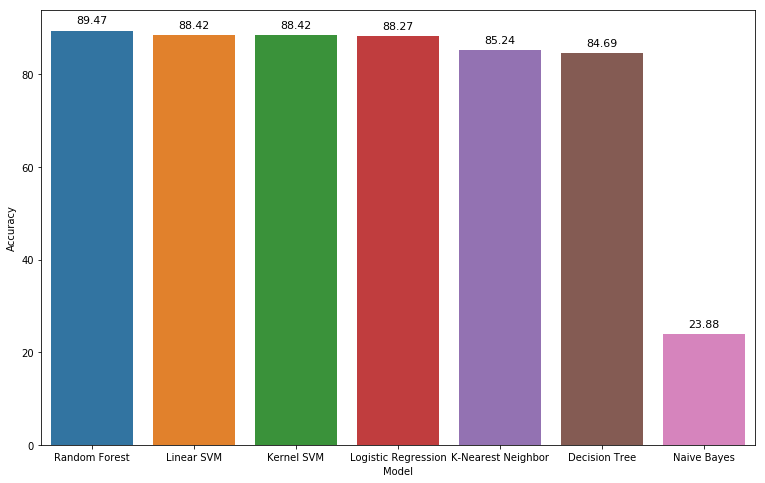

In [118]:
fig,ax = plt.subplots()
fig.set_size_inches(16,8)

#to get different colors for each of the variable assign the variable to hue
g=sns.barplot(x='Model',y='Accuracy',data=df,ax=ax)

#Code for to put legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adding respective values to the top of each bar
for p in ax.patches: 
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), 
                textcoords='offset points')

#To save the plot as 'SO.png'    
plt.savefig('SO.png',dpi=100,bbox_inches='tight')
plt.show()

In [132]:
Precisions = [round(np.mean(LR_precision),2),
              round(np.mean(KNN_precision),2),
              round(np.mean(LSVM_precision),2),
              round(np.mean(Kernel_SVM_precision),2),
              round(np.mean(NB_precision),2),
              round(np.mean(DT_precision),2),
              round(np.mean(RF3_precision),2)]

Recalls = [round(np.mean(LR_Recall),2),
              round(np.mean(KNN_Recall),2),
              round(np.mean(LSVM_Recall),2),
              round(np.mean(Kernel_SVM_Recall),2),
              round(np.mean(NB_Recall),2),
              round(np.mean(DT_Recall),2),
              round(np.mean(RF3_Recall),2)]

F1s = [round(np.mean(LR_F1),2),
              round(np.mean(KNN_F1),2),
              round(np.mean(LSVM_F1),2),
              round(np.mean(Kernel_SVM_F1),2),
              round(np.mean(NB_F1),2),
              round(np.mean(DT_F1),2),
              round(np.mean(RF3_F1),2)]

df1 = pd.DataFrame(list(zip(Classifiers, Precisions, Recalls, F1s)), columns = ["Model", "Precision", "Recall", "F1"])
df1.head()

,Model,Precision,Recall,F1
0,Logistic Regression,0.74,0.38,0.50
1,K-Nearest Neighbor,0.57,0.22,0.31
2,Linear SVM,0.73,0.40,0.51
3,Kernel SVM,0.76,0.38,0.50
4,Naive Bayes,0.17,0.99,0.29


In [ ]:
#col should be less than 15 categories 
def plot_multiple_bar2(col,list_of_measures,dataframe):
    
    temp_df = dataframe.groupby([col]).mean()[list_of_measures].reset_index()
    temp_df_melt = pd.melt(temp_df, id_vars=col, var_name="Parameters", value_name="Values")
    g =sns.factorplot(x=col, y='Values',hue ='Parameters', data=temp_df_melt, kind='bar',legend=False,size =7)
    g.set_xticklabels(fontsize='10')
    g.set_yticklabels(fontsize='20')
    g.set_xlabels(fontsize='10')
    g.set_ylabels(fontsize='20')
    g.add_legend(fontsize='20')
    g.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

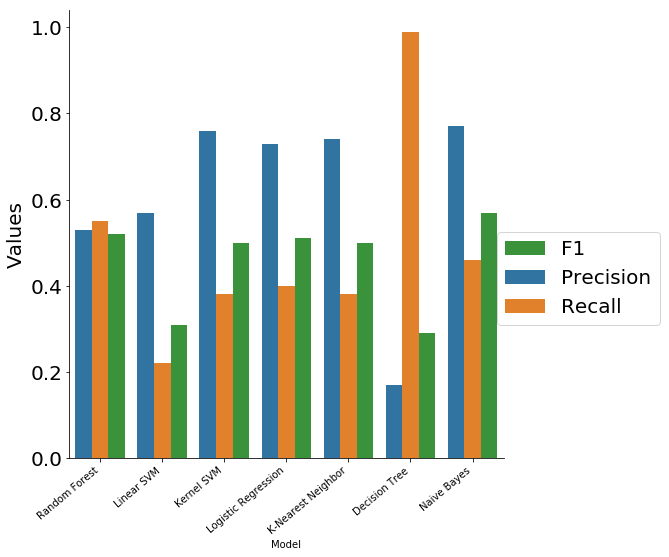

In [179]:
plot_multiple_bar2("Model",["Precision","Recall","F1"],df1)

In [123]:
plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])